✅ Data Loaded. Shape: (284807, 31)

🔍 Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -

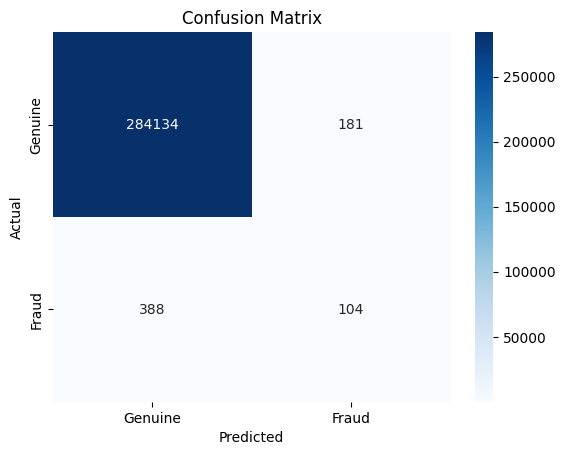

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv('creditcard.csv1.csv')
print("✅ Data Loaded. Shape:", df.shape)

# Step 3: Data Summary
print("\n🔍 Summary Statistics:")
print(df.describe())

print("\n📊 Class Distribution:")
print(df['Class'].value_counts())

# Step 4: Data Preprocessing
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Time' and 'Amount'
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Rearrange columns
columns = [col for col in df.columns if col != 'Class'] + ['Class']
df = df[columns]

# Step 5: Isolation Forest Model
X = df.drop('Class', axis=1)
y = df['Class']

model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
model.fit(X)

       # Predict (-1 for fraud, 1 for normal)
pred = model.predict(X)
pred = [1 if x == -1 else 0 for x in pred]  # Convert to 1 = Fraud, 0 = Normal

# Step 6: Evaluation
print("\n✅ Evaluation Metrics:\n")
print(confusion_matrix(y, pred))
print(classification_report(y, pred, target_names=["Genuine", "Fraud"]))

print(f"Accuracy  : {accuracy_score(y, pred) *100:.4f}")
print(f"Precision : {precision_score(y, pred):.4f}")
print(f"Recall    : {recall_score(y, pred):.4f}")
print(f"F1 Score  : {f1_score(y, pred):.4f}")

# Step 7: Confusion Matrix Heatmap
cm = confusion_matrix(y, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()